In [ ]:
# 필요한 패키지 설치

import pandas as pd 
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("/content/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# 컬럼 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159893 entries, 0 to 159892
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      159893 non-null  object 
 1   BMI               159893 non-null  float64
 2   Smoking           159893 non-null  object 
 3   AlcoholDrinking   159893 non-null  object 
 4   Stroke            159893 non-null  object 
 5   PhysicalHealth    159893 non-null  float64
 6   MentalHealth      159893 non-null  float64
 7   DiffWalking       159893 non-null  object 
 8   Sex               159893 non-null  object 
 9   AgeCategory       159893 non-null  object 
 10  Race              159893 non-null  object 
 11  Diabetic          159893 non-null  object 
 12  PhysicalActivity  159893 non-null  object 
 13  GenHealth         159892 non-null  object 
 14  SleepTime         159892 non-null  float64
 15  Asthma            159892 non-null  object 
 16  KidneyDisease     15

In [ ]:
# 명목형 변수 더미처리

# 하나의 가변수 범주 제거 옵션 적용
df2 = pd.@@@@@@@@(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True
                    )

df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes (during pregnancy),PhysicalActivity_Y,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
# RobustScaler 적용

# 숫자형 변수 분리
df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

# 숫자형 변수 RobustScaler 적용
RobustScaler = @@@@@@@@@@()
df_robust = RobustScaler.fit_transform(df_num)

# 컬럼명 결합
df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.@@@@@@([df_num2,df_nom],axis=1)

df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes (during pregnancy),PhysicalActivity_Y,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.419868,1.5,10.0,-1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,-0.924503,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.098013,10.0,10.0,0.5,0,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,-0.411921,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.478146,14.0,0.0,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
# 독립변수와 종속변수 분리하여 생성
X = df3.drop(['HeartDisease_Yes'],axis=1)
y = df3[['HeartDisease_Yes']]

# 학습셋과 테스트셋 분리하여 생성(7.5:2.5)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,@@@@@@@=0.25,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  119919
test data 개수:  39974


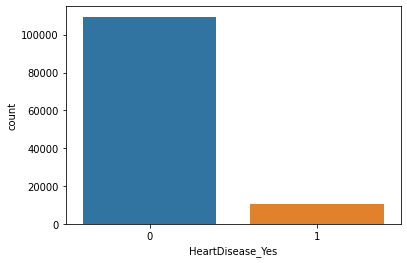

In [ ]:
# HeartDisease_Yes 컬럼 클래스 분포 시각화
sns.@@@@@@@@(x="HeartDisease_Yes", data=y_train)

plt.show()

In [ ]:
# 임시 변수명 적용

X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37','X38']
y_temp_name = ['y1']


X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38
30981,1.770861,0.0,0.000000,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
27647,0.369536,1.5,0.666667,-0.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9154,1.568212,0.0,1.000000,-0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
24862,-0.732450,0.0,6.666667,0.5,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
59697,-0.026490,0.0,0.000000,-0.5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).@@@@@@@@@(X_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train_re.shape, y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['y1']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (119919, 38) (119919, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (20876, 38) (20876, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 0    109481
1     10438
Name: y1, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 0    10438
1    10438
Name: y1, dtype: int64


In [ ]:
# 컬럼명 복구
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes (during pregnancy),PhysicalActivity_Y,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.870199,12.5,3.333333,-1.5,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1.671523,0.0,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.711258,2.5,1.666667,-1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.217219,0.0,0.333333,0.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,-0.565563,0.0,0.000000,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# 학습셋 모델 학습

model = @@@@@@@@@@@@@@@@()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', model.score(X_train_under, y_train_under))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도: 0.7679153094462541


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 테스트셋에 모델 적용
y_predict = model.predict(X_test)


# 테스트셋 모델 적합

print('테스트셋 모델 정확도:', model.score(X_test, y_test))

테스트셋 모델 정확도: 0.7501375894331316


In [ ]:
# 계수값 확인

print(model.coef_)

[[ 0.07961619  0.01095159  0.02223904 -0.05116248  0.41083738 -0.15181764
   1.34671868  0.1986614   0.73786424 -0.33271129  0.22204058  0.0647099
   0.65473138  0.73327499  1.20210121  1.52559374  1.77515282  2.08558514
   2.41644474  2.57871654  2.89297961 -0.47782887 -0.23388661 -0.2144888
  -0.0468559  -0.00776444  0.26735241  0.59223794  0.49002067  0.
   0.03929031  1.57654214  1.10764011  2.02803383  0.48831471  0.28727983
   0.73190491  0.11043205]]


In [ ]:
# 필요한 패키지 설치

!pip install scikit-plot
import pandas as pd 
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 기본 혼동행렬 출력

cm = @@@@@@@@@@@@@(y_test, y_predict)
print(cm)

[[27331  9266]
 [  722  2655]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

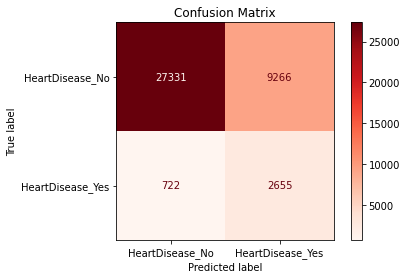

In [ ]:
# 혼동 행렬 시각화

label=['HeartDisease_No', 'HeartDisease_Yes'] # 라벨 설정
plot = @@@@@@@@@@@@@@@@@@@(model, # 분류 모델
                             X_test, y_test, 
                             display_labels=label, 
                             cmap=plt.cm.Reds, 
                             normalize=None) 
plot.ax_.set_title('Confusion Matrix')

In [ ]:
# 정확도, 오분류율, 정밀도, 민감도, 특이도, f-1스코어 산출

# 정확도
accuracy = model.score(X_test, y_test)
print('정확도:{:.3f}'.format(accuracy))

# 오분류율
error_rate = 1-model.score(X_test, y_test)
print('오분류율:{:.3f}'.format(error_rate))

# 정밀도
precision = @@@@@@@@@@@@@@@(y_test, y_predict)
print('정밀도:{:.3f}'.format(precision))

# 민감도(재현율)
recall = @@@@@@@@@@@@@@(y_test, y_predict)
print('민감도:{:.3f}'.format(recall))

# f1-스코어
f1 = f1_score(y_test, y_predict)
print('f1-스코어:{:.3f}'.format(f1))

정확도:0.750
오분류율:0.250
정밀도:0.223
민감도:0.786
f1-스코어:0.347


In [ ]:
# 향상도 테이블 생성

# 예측 스코어 산출 및 결합
probability = model.predict_proba(X_test)
y_probability_df = pd.DataFrame(probability,
                                columns=['probability_0','probability_1'])
y_df = pd.concat([y_test.reset_index()['HeartDisease_Yes'],
                  y_probability_df['probability_1']], axis=1)

# 10분위 컬럼 생성
y_df['decile'] = pd.qcut(y_df['probability_1'],10,
                         labels=['10','9','8','7','6','5','4','3','2','1'])

# 향상도 테이블을 위한 변수 설정
y_all = y_df['HeartDisease_Yes'].sum() # 전체 1값 수
base_lift = y_df['HeartDisease_Yes'
                ].sum()/y_df['HeartDisease_Yes'].count() # 기본 향상도

# 분위수 별 집계
y_df_gb = y_df.@@@@@@@@@@@(['decile']).agg(
    {'HeartDisease_Yes':'sum','probability_1':'count'}).reset_index()
y_df_gb = y_df_gb.@@@@@@@@@@@@(by='decile' ,ascending=False)

# 향상도 테이블 요소 생성 및 후처리
y_df_gb['Sensitivity'] = y_df_gb['HeartDisease_Yes']/y_all
y_df_gb['Precision'] = y_df_gb['HeartDisease_Yes']/y_df_gb['probability_1']
y_df_gb['Lift'] = y_df_gb['Precision']/base_lift
y_df_gb = y_df_gb.rename(
    columns={'HeartDisease_Yes':'Frequency of Y=1','probability_1':'Decile count'})

y_df_gb

,decile,Frequency of Y=1,Decile count,Sensitivity,Precision,Lift
9,1,1414.0,3998,0.418715,0.353677,4.186520
8,2,749.0,3997,0.221794,0.187391,2.218167
7,3,500.0,3997,0.148060,0.125094,1.480752
6,4,305.0,3998,0.090317,0.076288,0.903033
5,5,173.0,3997,0.051229,0.043282,0.512340
4,6,98.0,3997,0.029020,0.024518,0.290227
3,7,54.0,3998,0.015991,0.013507,0.159881
2,8,43.0,3997,0.012733,0.010758,0.127345
1,9,27.0,3997,0.007995,0.006755,0.079961
0,10,14.0,3998,0.004146,0.003502,0.041451


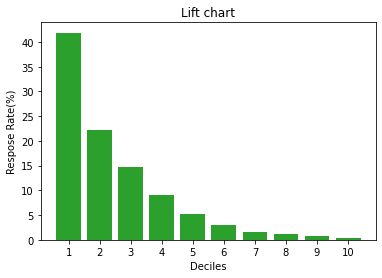

In [ ]:
# 향상도 차트 생성

bar_x = np.arange(10)

plt.bar(bar_x, y_df_gb['Sensitivity']*100, color='C2')
plt.xticks(bar_x, y_df_gb['decile'])
plt.title("Lift chart")
plt.xlabel("Deciles")
plt.ylabel("Respose Rate(%)")

plt.show()